In [16]:
# Importing essential libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno

In [52]:
# Settings for visualization  
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)

# Color palette for the visualiztion
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

In [18]:
# Saving the path to access the pre-processed dataset
relative_path_to_cars_dataset = r"vehicle_data.csv" 
# Reads/imports the csv dataset into this notebook
cars_data = pd.read_csv(relative_path_to_cars_dataset)

# Basic information of cars dataset
print("No. of rows in the cars_data:",cars_data.shape[0])
print("No. of columns in the cars_data:",cars_data.shape[1])
print()
print(cars_data.info())
# Top 5 observations of the dataframe
cars_data.head()

No. of rows in the cars_data: 901
No. of columns in the cars_data: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vehicle_brand   901 non-null    object 
 1   year            901 non-null    int64  
 2   cubic_capacity  876 non-null    float64
 3   km_driven       901 non-null    int64  
 4   selling_price   901 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 35.3+ KB
None


,vehicle_brand,year,cubic_capacity,km_driven,selling_price
0,Maruti,2018,1197.0,70000,509999
1,Ford,2017,1498.0,60000,800000
2,Maruti,2018,1248.0,58511,950000
3,Hyundai,2004,NaN,90000,90000
4,Hyundai,2012,1197.0,27000,290000


<AxesSubplot:>

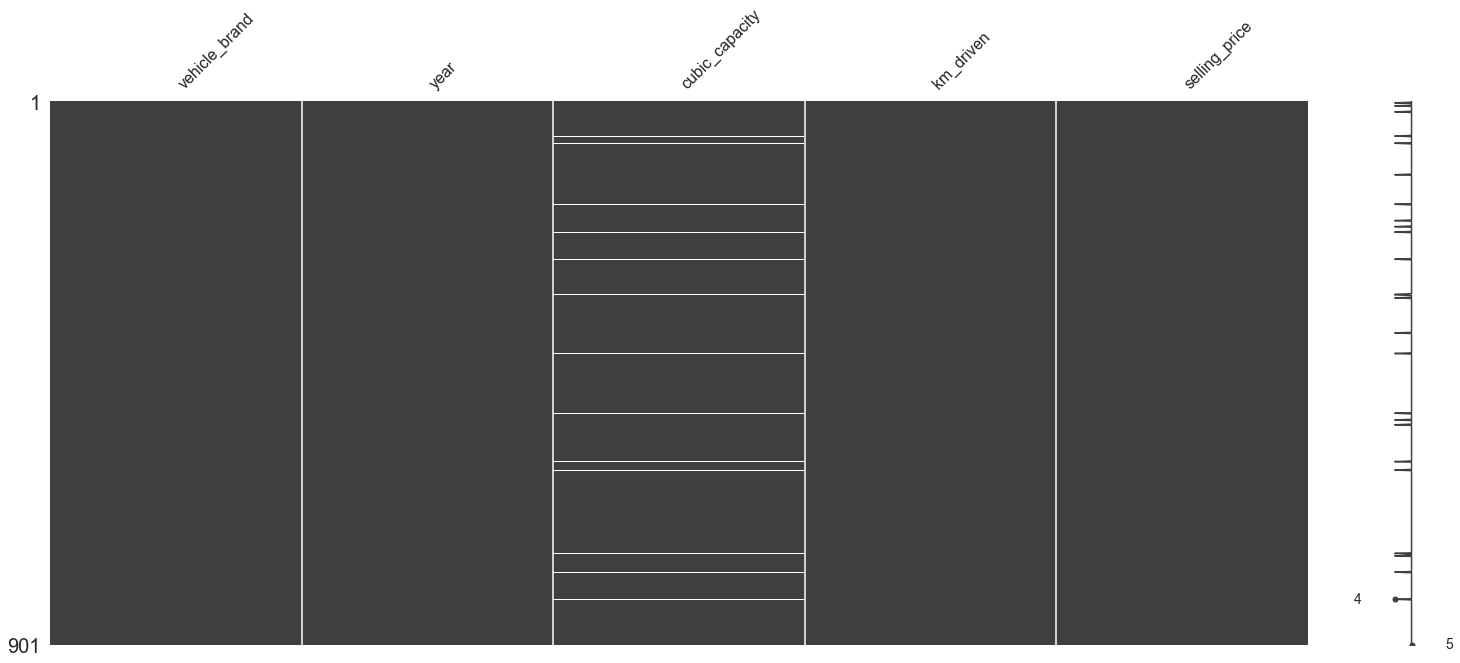

In [19]:
# Visualising the cubic_capcity column for knowing the empty values
msno.matrix(cars_data)

**Observation**: We can observe that there are some empty values in cubic_capacity column, we have to handle the missing values. Since the missing values are related to the engine specification of a car, We have the brand names 

In [20]:
# Displaying the unique brand names in the dataset
print("List of unique brand names in the dataset: ")
# Saves the unique brands list into the variable
unique_brands_list = cars_data["vehicle_brand"].unique()
print(unique_brands_list)

# Prints an empty line
print()
# Prints total number of unique brands in dataset
print("Total number of unique brands in dataset: ", len(unique_brands_list))

# Displays the mean value for each brand 

# Declaring a variable to store a new dataset that has no null values
cars_data_without_null_values = cars_data.dropna()

# Empty Cubic_capacity values grouped by vehicle brand (breakup of 25 empty values)  
print()
print("Vehicle brands and their respective count of null values: ")
cars_data[cars_data.cubic_capacity.isnull() == True].groupby("vehicle_brand").count()["year"]

List of unique brand names in the dataset: 
['Maruti' 'Ford' 'Hyundai' 'Tata' 'Renault' 'Skoda' 'Mahindra' 'Toyota'
 'Volkswagen' 'Honda' 'Nissan' 'Chevrolet' 'Mercedes-Benz' 'Jeep' 'Datsun'
 'Fiat' 'BMW' 'Kia' 'Isuzu' 'Audi' 'Lexus' 'Mitsubishi']

Total number of unique brands in dataset:  22

Vehicle brands and their respective count of null values: 


vehicle_brand
Honda       1
Hyundai     9
Mahindra    3
Maruti      8
Tata        2
Toyota      2
Name: year, dtype: int64

**Handling missing values**:
There are 3 techniques to handle missing values
- Delete the missing values, this will lead to data loss, since we have a small dataset, we dont want to lode more observations
- Create a seperate model to handle missing values. This is a very complicated approach, so we move on. 
- Use of statistical methods like mean, median or mode, but we have to decide which one to use  

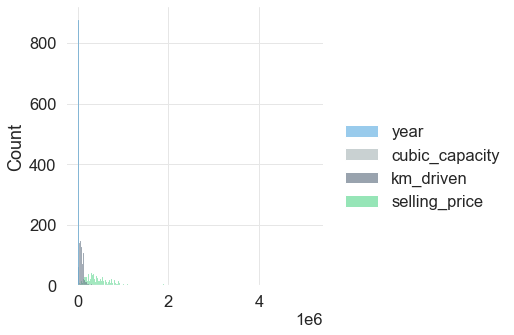

<Figure size 2000x800 with 0 Axes>

In [56]:
# Distrubution of the entire dataset to know what the distribution is like
# Analysing the distibution of the dataset without null values
sns.displot(cars_data_without_null_values)
plt.figure(figsize=(25, 10), dpi=80)
plt.show()

Text(0, 0.5, 'Cubic Capacity')

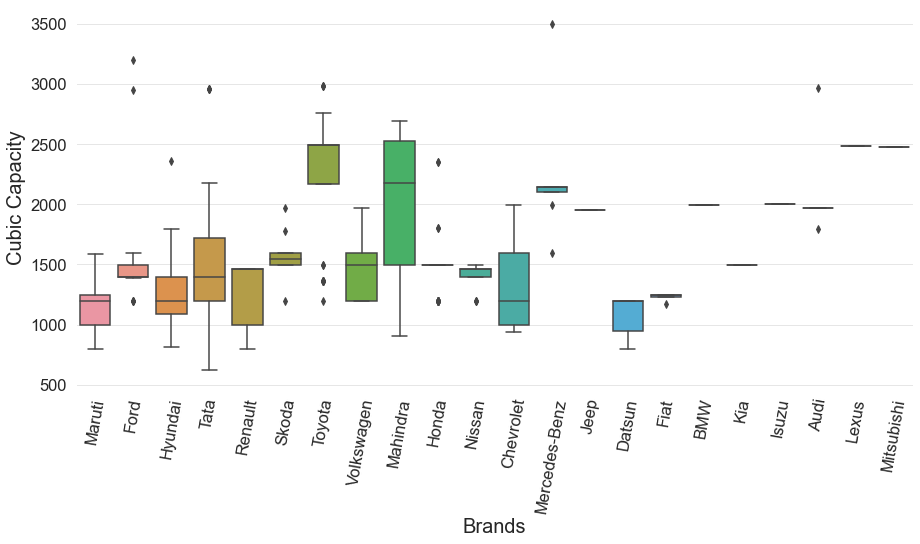

In [50]:
# Displays the box plot for all the brand's Cubic Capacities
plt.figure(figsize=(15,7)) # Sets the figure size
# Box plot is constructed using the cubic capacity for each brand, it made sure the null values are removed before the 
# box plot is built
sns.boxplot(x="vehicle_brand", y="cubic_capacity", data=cars_data_without_null_values)
# Basic settings
plt.xticks(rotation=80)
plt.xlabel("Brands", fontsize = 20)
plt.ylabel("Cubic Capacity", fontsize = 20)

In [44]:
# List of brands that have missing values
brands_with_missing_cc = cars_data[cars_data.cubic_capacity.isnull() == True]["vehicle_brand"].unique()

# Displaying the list of brands with missing values
print("Displaying the list of all brands with missing values: ")
print(brands_with_missing_cc)
print()
# Specifying indices to be dropped
index_to_be_dropped = [5, 2, 4, 3]

# Dropping the brands that have very low missing values
brands_for_handling_missing_values = np.delete(brands_with_missing_cc, index_to_be_dropped) 

# Displaying the brands that are to be analysed for handling missing values
print("Displaying the brands that are to be analysed for handling missing values: ")
print(brands_for_handling_missing_values)

Displaying the list of all brands with missing values: 
['Hyundai' 'Maruti' 'Mahindra' 'Toyota' 'Tata' 'Honda']

Displaying the brands that are to be analysed for handling missing values: 
['Hyundai' 'Maruti']


In [49]:
# Funtion to display the distribution of the CC and the respective skewness value of each brand with missing values
def skewness_finder(brand_name):
    print("Distribution for",brand_name)
    x_axis = cars_data[cars_data["vehicle_brand"] == brand_name]["cubic_capacity"].dropna()
    plt.figure(figsize = (20,10))
    sns.displot(x_axis, kde = True)
    plt.show()
    skewness_value = stats.skew(x_axis)
    print("Skewness: ",stats.skew(x_axis))
    if skewness_value < 0:
        print("Distribution is negatively skewed or skewed left")
    elif skewness_value == 0:
        print("It is a normal distribution")
    else:
        print("Distribution is positively skewed or skewed right")
    # Empty line
    print()

Distribution for Hyundai


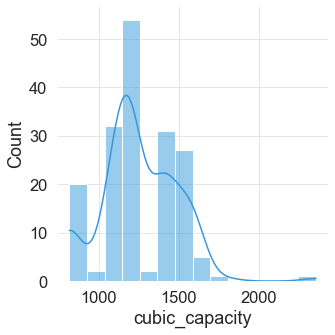

Skewness:  0.382000924362514
Distribution is positively skewed or skewed right

Distribution for Maruti


<Figure size 1440x720 with 0 Axes>

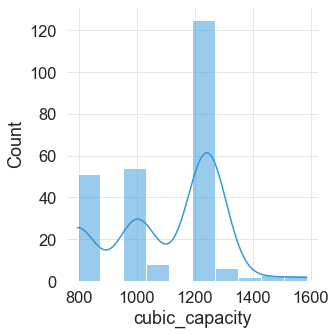

Skewness:  -0.3338002285069311
Distribution is negatively skewed or skewed left



<Figure size 1440x720 with 0 Axes>

In [48]:
# Iterating over each brand which has the missing values to plot the graph and find the skewness
for each_brand in brands_for_handling_missing_values:
    # Calling the function to plot the grahs for each iteration
    skewness_finder(each_brand)

**Obseravtion**: From the above graphs we can see that none of the graphs are normally distributed. They are left and right skewed for Hyundai and Maruti respectively. Therefore it has been decided to use median instead of mean for calculating the measure of centre. And then the median of CC values of Maruti and Hyundai are imputed into theo the empty cells of the respective brands. Rest of brands with very very low missing values are dropped/deleted

**Observation**:

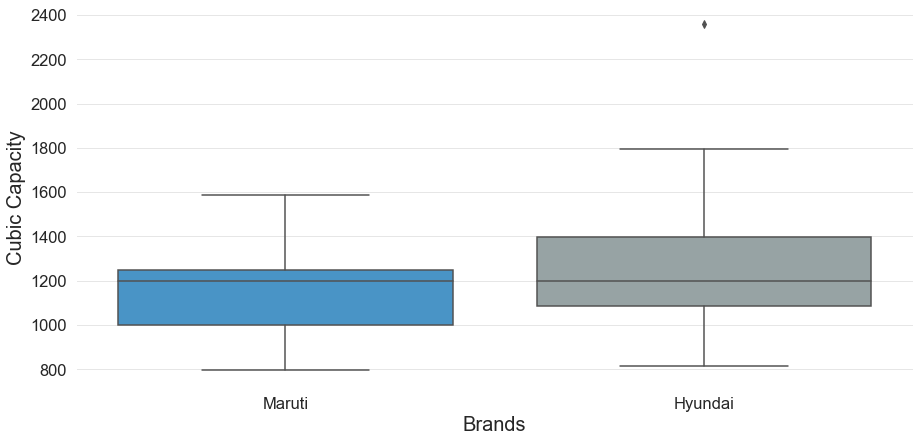

In [64]:
# Variable holds the  
empty_data = cars_data_without_null_values[
         (cars_data_without_null_values["vehicle_brand"] == "Hyundai") | 
         (cars_data_without_null_values["vehicle_brand"] == "Maruti")]
         
# Displays the boxplot
plt.figure(figsize=(15,7))
# Box plot is constructed using the cubic capacity for each brand, it made sure the null values are removed before the 
# box plot is built
sns.boxplot(x="vehicle_brand", y="cubic_capacity", data=empty_data)
# Basic settings
plt.xlabel("Brands", fontsize = 20)
plt.ylabel("Cubic Capacity", fontsize = 20)

# to display the plot
plt.show()

**Observation**:


In [ ]:
# Removing the brands with very low number of missing values

In [ ]:
# Imputing the mean value into missing cells in Maruti and Hyundai brands

In [ ]:
# Showing the 

In [361]:
# # Function to print the mean values of list of brnad names
# def impute_mean_cubic_capacity(unique_brands_list):
#         for brand in unique_brands_list:
#             print(brand,":",cars_data_without_null_values[cars_data_without_null_values["vehicle_brand"] == brand]["cubic_capacity"].mean())

# # Declaring a variable that holds the list of brands with null value 
# bands_with_null_values = cars_data[cars_data.cubic_capacity.isnull() == True]["vehicle_brand"].unique()
# # 
# print("Mean cubic capcityies of the brands that has null CC values: ")
# impute_mean_cubic_capacity(bands_with_null_values)


In [362]:
# # Computing the mean CC for each brand using groupby method
# mean_cubic_capcity_of_each_brand = cars_data.groupby("vehicle_brand").mean()["cubic_capacity"]
# # Saving name of the occupation and it's respective mean ratings into the variables
# occupations = mean_cubic_capcity_of_each_brand.index
# mean_ratings = mean_cubic_capcity_of_each_brand.values

# # Scatter plot to show the mean ratings for each category
# plt.title("Mean Ratings from Each Occupation")
# plt.scatter(x=occupations, y=mean_ratings, c='red', s=200, alpha=0.5, marker = "x")
# plt.xticks(rotation=80, fontsize = 15)

# # To show the plot
# plt.show()